In [2]:
#load necessary packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import sklearn as sk
from math import sqrt
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from scipy.stats import boxcox 
import sys



  #researchpy catalyst
import yellowbrick
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import gpboost as gpb


In [3]:
Strava = pd.read_csv(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\MODEL\strava_group_dataframe.csv', sep='\t')

In [4]:
Strava.describe()

,Unnamed: 0,edge_id,hour,year,day,minute,athlete_count,rev_athlete_count,activity_count,rev_activity_count,total_athlete_count,total_activity_count,activity_time,rev_activity_time,commute_count,Rec count
count,187299.000000,1.872990e+05,187299.000000,187299.000000,187299.000000,187299.0,187299.000000,187299.000000,187299.000000,187299.000000,187299.000000,187299.000000,187299.000000,187299.000000,187299.000000,187299.000000
mean,93649.000000,2.163657e+06,12.957896,18682.006791,2062.732898,0.0,29.600105,22.260984,29.829711,22.429244,72.586399,73.120332,48.035841,42.159024,24.592817,48.527515
std,54068.708372,1.525004e+06,4.346278,27409.057253,3052.831534,0.0,69.568561,63.823582,70.021054,64.200759,131.060922,131.928808,241.440984,235.833873,77.145449,89.165372
min,0.000000,2.607800e+04,4.000000,2018.000000,182.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,46824.500000,8.328460e+05,9.000000,2018.000000,251.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,93649.000000,2.094768e+06,13.000000,6054.000000,699.000000,0.0,5.000000,5.000000,5.000000,5.000000,20.000000,20.000000,2.500000,0.000000,0.000000,15.000000
75%,140473.500000,3.298863e+06,17.000000,22198.000000,2373.000000,0.0,25.000000,15.000000,25.000000,15.000000,70.000000,70.000000,21.000000,14.500000,10.000000,50.000000
max,187298.000000,5.396174e+06,23.000000,179602.000000,20202.000000,0.0,1285.000000,1155.000000,1295.000000,1165.000000,1750.000000,1755.000000,26590.000000,28932.000000,1425.000000,1455.000000


In [5]:
roads = pd.read_csv(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\MODEL\newcastle_dataframe.csv', sep='\t')

In [6]:
roads.head(2)
#roads.describe()
#roads.columns
#drop duplicate columns
#roads = roads.drop(['total_activity_count','commute_count'], axis=1)
roads.columns
roads.isnull().sum()
roads.columns

Index(['Unnamed: 0', 'edge_id', 'geometry', 'CTGS', 'total_activity_count',
       'commute_count', 'length_km', 'distances to nearest bus stop(m)',
       'Distance to train station (m)', 'road_category', 'major intersections',
       'minor intersections', 'shannon(bird)', 'Bcount', 'shannon(mammal)',
       'Mcount', 'shannon(plants)', 'Pcount', 'pct', 'land_cover',
       'road_category_right'],
      dtype='object')

In [7]:
roads = gpd.read_file(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\Strava\road_file.geojson')

Text(0.5, 1.0, 'Rec count Distribution ')

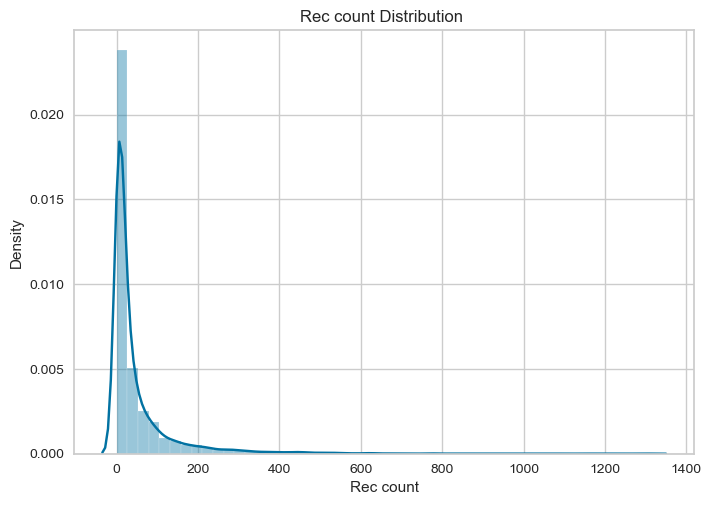

In [8]:
#merge all road data with city centre strava data
group = roads.merge(Strava, on = "edge_id")
#sns.distplot(group["total_activity_count"])

#group["Rec_count"] = group["total_activity_count"] -group["commute_count"]

#plot the distribution of the transformed data values
#sns.distplot(group["RCR"], hist=True, kde=True).set_title('RCR Distribution ')
sns.distplot(group["Rec count"], hist=True, kde=True).set_title('Rec count Distribution ')

In [9]:
#group["Rec count"] = group["total_activity_count_y"] -group["commute_count_y"]
group.columns
group.shape
#group.head(5)

(45515, 36)

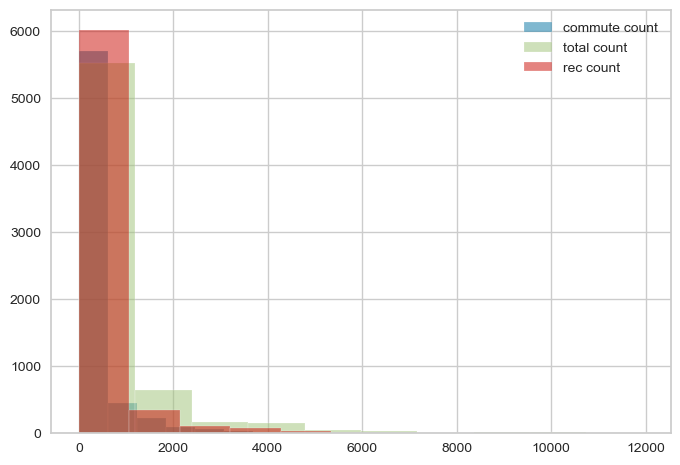

In [10]:
#sns.distplot(roads["Rec count"], hist=True, kde=True).set_title('Recreational Count Distribution ')
#sns.distplot(roads["total_activity_count_x"], hist=True, kde=True).set_title('Total Activity Count Distribution ')
#sns.distplot(roads["commute_count_x"], hist=True, kde=True).set_title('Commute Count Distribution ')
import random
import numpy
from matplotlib import pyplot
roads = pd.read_csv(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\MODEL\newcastle_dataframe.csv', sep='\t')
roads["Rec_count"] = roads["total_activity_count"] -roads["commute_count"]
df1 = roads["commute_count"] 
df2 = roads["total_activity_count"]
df3 = roads["Rec_count"]

pyplot.hist(df1, alpha=0.5, label='commute count')
pyplot.hist(df2, alpha=0.5, label='total count')
pyplot.hist(df3, alpha=0.5, label='rec count')
pyplot.legend(loc='upper right')
pyplot.show()



plt.show()


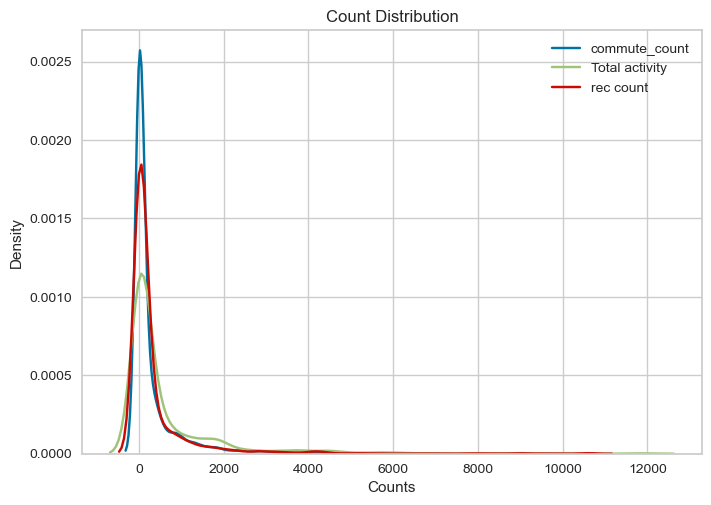

In [11]:
ax = plt.axes()
sns.kdeplot(df1, ax=ax,label="commute_count")
sns.kdeplot(df2, ax=ax,label="Total activity")
sns.kdeplot(df3, ax=ax,label="rec count")
ax.set_title('Count Distribution')
ax.set_xlabel('Counts')
plt.legend() 
plt.show()

<Axes: ylabel='Sex Divide'>

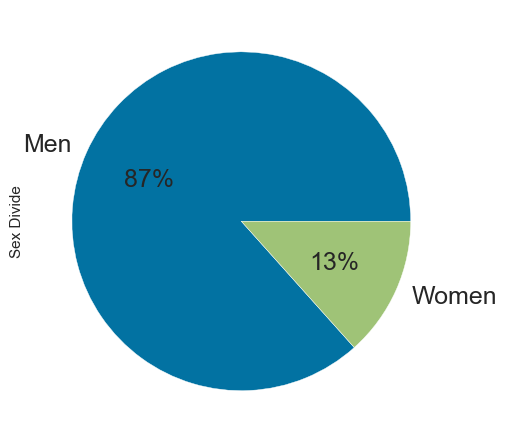

In [12]:
df = pd.DataFrame({'Sex Divide': [6485,1002]},
                  index=['Men', 'Women'])
plt.rcParams.update({'font.size': 22})

df.plot.pie(y="Sex Divide",autopct='%1.0f%%', legend = False,fontsize=18)


In [13]:
#fill nans with either zero for biodiveristy or remove
group['Bcount'] = group['Bcount'].fillna(0)
group['shannon(bird)'] = group['shannon(bird)'].fillna(0)
group['Mcount'] = group['Mcount'].fillna(0)
group['shannon(mammal)'] = group['shannon(mammal)'].fillna(0)
group['Pcount'] = group['Pcount'].fillna(0)
group['shannon(plants)'] = group['shannon(plants)'].fillna(0)
group["pct"] = group['pct'].fillna(0)
#drop road category 
group= group.drop(["road_category"], axis=1)
group.isnull().sum()

edge_id                             0
CTGS                                0
total_activity_count_x              0
commute_count_x                     0
length_km                           0
distances to nearest bus stop(m)    0
Distance to train station (m)       0
major intersections                 0
minor intersections                 0
shannon(bird)                       0
Bcount                              0
shannon(mammal)                     0
Mcount                              0
shannon(plants)                     0
Pcount                              0
pct                                 0
land_cover                          0
road_category_right                 0
geometry                            0
Unnamed: 0                          0
hour                                0
year                                0
day                                 0
minute                              0
athlete_count                       0
rev_athlete_count                   0
activity_cou

In [14]:
group.isna().any()

edge_id                             False
CTGS                                False
total_activity_count_x              False
commute_count_x                     False
length_km                           False
distances to nearest bus stop(m)    False
Distance to train station (m)       False
major intersections                 False
minor intersections                 False
shannon(bird)                       False
Bcount                              False
shannon(mammal)                     False
Mcount                              False
shannon(plants)                     False
Pcount                              False
pct                                 False
land_cover                          False
road_category_right                 False
geometry                            False
Unnamed: 0                          False
hour                                False
year                                False
day                                 False
minute                            

In [15]:
group.describe()

,edge_id,total_activity_count_x,commute_count_x,length_km,distances to nearest bus stop(m),Distance to train station (m),major intersections,minor intersections,shannon(bird),Bcount,...,athlete_count,rev_athlete_count,activity_count,rev_activity_count,total_athlete_count,total_activity_count_y,activity_time,rev_activity_time,commute_count_y,Rec count
count,4.551500e+04,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,...,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000
mean,2.107925e+06,1310.298363,567.303197,0.080008,95.560906,3964.669909,1.483006,5.498737,0.201498,193.307020,...,37.804680,26.046578,38.145337,26.257278,90.923432,91.633198,66.532594,53.959739,40.865978,50.767220
std,1.648474e+06,1804.192258,820.898047,0.164662,157.423492,2565.755371,2.130460,4.011044,0.797629,2057.555181,...,87.019788,73.665602,87.647623,74.149886,155.605877,156.713439,372.731573,367.439464,104.348513,99.793257
min,2.617500e+04,5.000000,0.000000,0.000006,0.000000,50.136943,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,5.091390e+05,165.000000,45.000000,0.018618,21.588762,1751.473294,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,1.829693e+06,620.000000,230.000000,0.040348,56.531936,3812.072906,0.000000,4.000000,0.000000,0.000000,...,5.000000,5.000000,5.000000,5.000000,25.000000,25.000000,2.000000,0.000000,5.000000,15.000000
75%,3.426152e+06,1742.500000,780.000000,0.082003,109.631287,5456.801412,3.000000,8.000000,0.000000,0.000000,...,30.000000,15.000000,30.000000,15.000000,100.000000,100.000000,23.000000,14.000000,25.000000,50.000000
max,5.392436e+06,11935.000000,6135.000000,5.528865,2432.678126,11784.972520,14.000000,52.000000,4.328743,31124.000000,...,1130.000000,1155.000000,1130.000000,1165.000000,1750.000000,1755.000000,26590.000000,28932.000000,1425.000000,1315.000000


In [16]:

#preprocess categorical variables
# handle categorical variable
road_category =pd.get_dummies(group['road_category_right'],drop_first = True)
# dropping extra column
group= group.drop("road_category_right",axis=1)
# concatation of independent variables and new cateorical variable.
group=pd.concat([group,road_category],axis=1)
group


,edge_id,CTGS,total_activity_count_x,commute_count_x,length_km,distances to nearest bus stop(m),Distance to train station (m),major intersections,minor intersections,shannon(bird),...,activity_count,rev_activity_count,total_athlete_count,total_activity_count_y,activity_time,rev_activity_time,commute_count_y,Rec count,time_of_day,minor
0,1807052,False,20,0,0.232850,31.820169,5070.915271,0,8,0.0,...,0,15,20,20,0.0,83.5,0,20,peak am,True
1,1807051,False,20,0,0.012108,83.031767,5174.585407,0,6,0.0,...,0,15,20,20,0.0,0.0,0,20,peak am,True
2,1807050,False,20,0,0.170138,5.031857,5183.992498,0,6,0.0,...,0,15,20,20,0.0,55.5,0,20,peak am,True
3,1019335,False,5,0,0.139677,20.405584,5100.383035,0,12,0.0,...,0,5,5,5,0.0,22.5,0,5,midday,True
4,420138,False,35,0,0.055550,73.589777,5238.368616,0,10,0.0,...,0,20,25,25,0.0,10.5,0,25,peak am,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45510,725501,False,205,75,0.053764,727.389974,5496.320528,0,2,0.0,...,30,0,50,55,31.5,0.0,15,40,late pm,True
45511,725501,False,205,75,0.053764,727.389974,5496.320528,0,2,0.0,...,0,0,15,15,0.0,0.0,0,15,early pm,True
45512,725501,False,205,75,0.053764,727.389974,5496.320528,0,2,0.0,...,0,10,10,10,0.0,8.0,0,10,late pm,True
45513,725501,False,205,75,0.053764,727.389974,5496.320528,0,2,0.0,...,5,5,15,15,8.0,9.0,0,15,late pm,True


In [17]:
group =group.rename(columns={"minor": "Road_category_minor"})

In [18]:

#preprocess categorical variables
# handle categorical variable
CTGS =pd.get_dummies(group['CTGS'],drop_first = True)
# dropping extra column
group= group.drop("CTGS",axis=1)
# concatation of independent variables and new cateorical variable.
group=pd.concat([group,CTGS],axis=1)
group


,edge_id,total_activity_count_x,commute_count_x,length_km,distances to nearest bus stop(m),Distance to train station (m),major intersections,minor intersections,shannon(bird),Bcount,...,rev_activity_count,total_athlete_count,total_activity_count_y,activity_time,rev_activity_time,commute_count_y,Rec count,time_of_day,Road_category_minor,True
0,1807052,20,0,0.232850,31.820169,5070.915271,0,8,0.0,0.0,...,15,20,20,0.0,83.5,0,20,peak am,True,False
1,1807051,20,0,0.012108,83.031767,5174.585407,0,6,0.0,0.0,...,15,20,20,0.0,0.0,0,20,peak am,True,False
2,1807050,20,0,0.170138,5.031857,5183.992498,0,6,0.0,0.0,...,15,20,20,0.0,55.5,0,20,peak am,True,False
3,1019335,5,0,0.139677,20.405584,5100.383035,0,12,0.0,0.0,...,5,5,5,0.0,22.5,0,5,midday,True,False
4,420138,35,0,0.055550,73.589777,5238.368616,0,10,0.0,0.0,...,20,25,25,0.0,10.5,0,25,peak am,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45510,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,0,50,55,31.5,0.0,15,40,late pm,True,False
45511,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,0,15,15,0.0,0.0,0,15,early pm,True,False
45512,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,10,10,10,0.0,8.0,0,10,late pm,True,False
45513,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,5,15,15,8.0,9.0,0,15,late pm,True,False


In [19]:
group =group.rename(columns={"True": "CTGS True", "pct":"% tree cover"})
group

,edge_id,total_activity_count_x,commute_count_x,length_km,distances to nearest bus stop(m),Distance to train station (m),major intersections,minor intersections,shannon(bird),Bcount,...,rev_activity_count,total_athlete_count,total_activity_count_y,activity_time,rev_activity_time,commute_count_y,Rec count,time_of_day,Road_category_minor,CTGS True
0,1807052,20,0,0.232850,31.820169,5070.915271,0,8,0.0,0.0,...,15,20,20,0.0,83.5,0,20,peak am,True,False
1,1807051,20,0,0.012108,83.031767,5174.585407,0,6,0.0,0.0,...,15,20,20,0.0,0.0,0,20,peak am,True,False
2,1807050,20,0,0.170138,5.031857,5183.992498,0,6,0.0,0.0,...,15,20,20,0.0,55.5,0,20,peak am,True,False
3,1019335,5,0,0.139677,20.405584,5100.383035,0,12,0.0,0.0,...,5,5,5,0.0,22.5,0,5,midday,True,False
4,420138,35,0,0.055550,73.589777,5238.368616,0,10,0.0,0.0,...,20,25,25,0.0,10.5,0,25,peak am,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45510,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,0,50,55,31.5,0.0,15,40,late pm,True,False
45511,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,0,15,15,0.0,0.0,0,15,early pm,True,False
45512,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,10,10,10,0.0,8.0,0,10,late pm,True,False
45513,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,5,15,15,8.0,9.0,0,15,late pm,True,False


In [20]:
#repeat for other variables
land =pd.get_dummies(group['land_cover'],drop_first = True)
# dropping extra column and commute and total activity counts
group= group.drop(["land_cover"], axis=1)
# concatation of independent variables and new cateorical variable.
group=pd.concat([group,land],axis=1)
group
#When you have a categorical variable with K mutually exclusive categories, you actually only need K – 1 new dummy variables to encode the same information.

,edge_id,total_activity_count_x,commute_count_x,length_km,distances to nearest bus stop(m),Distance to train station (m),major intersections,minor intersections,shannon(bird),Bcount,...,activity_time,rev_activity_time,commute_count_y,Rec count,time_of_day,Road_category_minor,CTGS True,Natural,Otherbuilt-up,urban
0,1807052,20,0,0.232850,31.820169,5070.915271,0,8,0.0,0.0,...,0.0,83.5,0,20,peak am,True,False,False,False,False
1,1807051,20,0,0.012108,83.031767,5174.585407,0,6,0.0,0.0,...,0.0,0.0,0,20,peak am,True,False,False,False,False
2,1807050,20,0,0.170138,5.031857,5183.992498,0,6,0.0,0.0,...,0.0,55.5,0,20,peak am,True,False,False,False,False
3,1019335,5,0,0.139677,20.405584,5100.383035,0,12,0.0,0.0,...,0.0,22.5,0,5,midday,True,False,False,False,False
4,420138,35,0,0.055550,73.589777,5238.368616,0,10,0.0,0.0,...,0.0,10.5,0,25,peak am,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45510,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,31.5,0.0,15,40,late pm,True,False,False,False,True
45511,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,0.0,0.0,0,15,early pm,True,False,False,False,True
45512,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,0.0,8.0,0,10,late pm,True,False,False,False,True
45513,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,8.0,9.0,0,15,late pm,True,False,False,False,True


In [21]:
#repeat for other variables
time =pd.get_dummies(group['time_of_day'],drop_first = True)
# dropping extra column and commute and total activity counts
group= group.drop(["time_of_day"], axis=1)
# concatation of independent variables and new cateorical variable.
group=pd.concat([group,time],axis=1)
group

,edge_id,total_activity_count_x,commute_count_x,length_km,distances to nearest bus stop(m),Distance to train station (m),major intersections,minor intersections,shannon(bird),Bcount,...,Road_category_minor,CTGS True,Natural,Otherbuilt-up,urban,early pm,late pm,midday,peak am,peak pm
0,1807052,20,0,0.232850,31.820169,5070.915271,0,8,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
1,1807051,20,0,0.012108,83.031767,5174.585407,0,6,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
2,1807050,20,0,0.170138,5.031857,5183.992498,0,6,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
3,1019335,5,0,0.139677,20.405584,5100.383035,0,12,0.0,0.0,...,True,False,False,False,False,False,False,True,False,False
4,420138,35,0,0.055550,73.589777,5238.368616,0,10,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45510,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,True,False,False,False,True,False,True,False,False,False
45511,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,True,False,False,False,True,True,False,False,False,False
45512,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,True,False,False,False,True,False,True,False,False,False
45513,725501,205,75,0.053764,727.389974,5496.320528,0,2,0.0,0.0,...,True,False,False,False,True,False,True,False,False,False


In [22]:
group.columns = group.columns.astype(str)
group.columns

Index(['edge_id', 'total_activity_count_x', 'commute_count_x', 'length_km',
       'distances to nearest bus stop(m)', 'Distance to train station (m)',
       'major intersections', 'minor intersections', 'shannon(bird)', 'Bcount',
       'shannon(mammal)', 'Mcount', 'shannon(plants)', 'Pcount',
       '% tree cover', 'geometry', 'Unnamed: 0', 'hour', 'year', 'day',
       'minute', 'athlete_count', 'rev_athlete_count', 'activity_count',
       'rev_activity_count', 'total_athlete_count', 'total_activity_count_y',
       'activity_time', 'rev_activity_time', 'commute_count_y', 'Rec count',
       'Road_category_minor', 'CTGS True', 'Natural', 'Otherbuilt-up', 'urban',
       'early pm', 'late pm', 'midday', 'peak am', 'peak pm'],
      dtype='object')

In [23]:
group =group.rename(columns={"True": "CTGS True", "pct":"% tree cover", "early pm" :"TOTD Early PM Hours","late pm" :"TOTD Late PM Hours","midday" :"TOTD Midday hours","peak am" : "TOTD AM Peak Hours","peak pm" : "TOTD PM Peak Hours","Natural" :"DLUT Natural", "Otherbuilt-up":"DLUT Other built-up","urban" :"DLUT urban","length_km":"Road_length" })

In [24]:
group =group.rename(columns={"shannon(bird)": "Shannon Index (Bird)","shannon(mammal)": "Shannon Index (Mammal)","shannon(plants)": "Shannon Index (Plant)" })
group =group.rename(columns={"Bcount": "Bird Abundance","Mcount": "Mammal Abundance","Pcount": "Plant Abundance" })
group =group.rename(columns={"length_km_x": "Road length","distances to nearest bus stop(m)": "Distance to the nearest bus stop","Distance to train station (m)":"Distance to train station"})
group =group.rename(columns={"major intersections": "Connectivity of major road","minor intersections": "Connectivity of minor road", "Rec count_y": "rec_count"})
group.columns

Index(['edge_id', 'total_activity_count_x', 'commute_count_x', 'Road_length',
       'Distance to the nearest bus stop', 'Distance to train station',
       'Connectivity of major road', 'Connectivity of minor road',
       'Shannon Index (Bird)', 'Bird Abundance', 'Shannon Index (Mammal)',
       'Mammal Abundance', 'Shannon Index (Plant)', 'Plant Abundance',
       '% tree cover', 'geometry', 'Unnamed: 0', 'hour', 'year', 'day',
       'minute', 'athlete_count', 'rev_athlete_count', 'activity_count',
       'rev_activity_count', 'total_athlete_count', 'total_activity_count_y',
       'activity_time', 'rev_activity_time', 'commute_count_y', 'Rec count',
       'Road_category_minor', 'CTGS True', 'DLUT Natural',
       'DLUT Other built-up', 'DLUT urban', 'TOTD Early PM Hours',
       'TOTD Late PM Hours', 'TOTD Midday hours', 'TOTD AM Peak Hours',
       'TOTD PM Peak Hours'],
      dtype='object')

In [25]:
sns.heatmap(group.corr(method = "spearman"))

TypeError: float() argument must be a string or a real number, not 'LineString'

In [ ]:
group = group.drop(['Rec count_x', 'Unnamed: 0_y', 'hour', 'year', 'day',
       'minute', 'athlete_count', 'rev_athlete_count', 'activity_count','commute_count',
       'rev_activity_count', 'total_athlete_count', 'total_activity_count',
       'activity_time', 'rev_activity_time', 'commute_count','Unnamed: 0_x', 'geometry_x', 'total_activity_count_x','commute_count_x'], axis=1)

In [ ]:
sns.heatmap(group.corr(method = "spearman"),annot=False)

In [26]:
print(group.isnull().sum().sum())

0


In [27]:
#drop road category na's
group = group.dropna()

<Axes: xlabel='Rec count', ylabel='Density'>

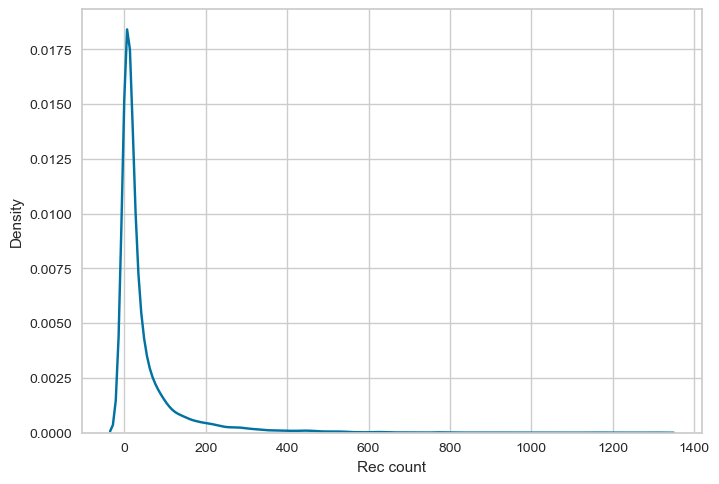

In [28]:
#group["RCR"].hist(bins=10)
sns.distplot(group["Rec count"], hist=False, kde=True) 

TypeError: float() argument must be a string or a real number, not 'LineString'

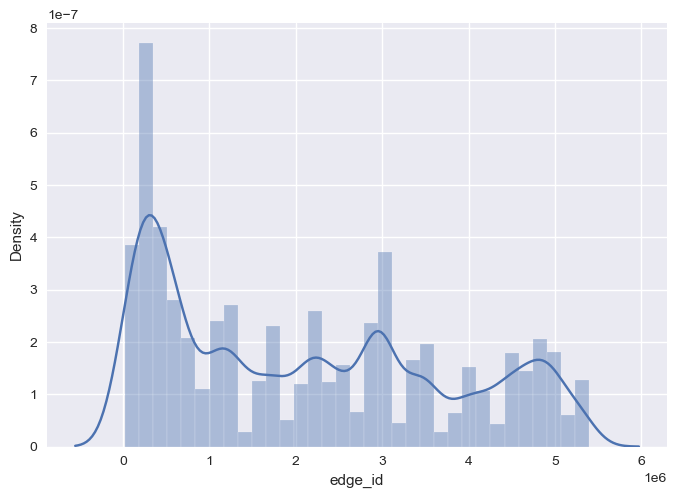

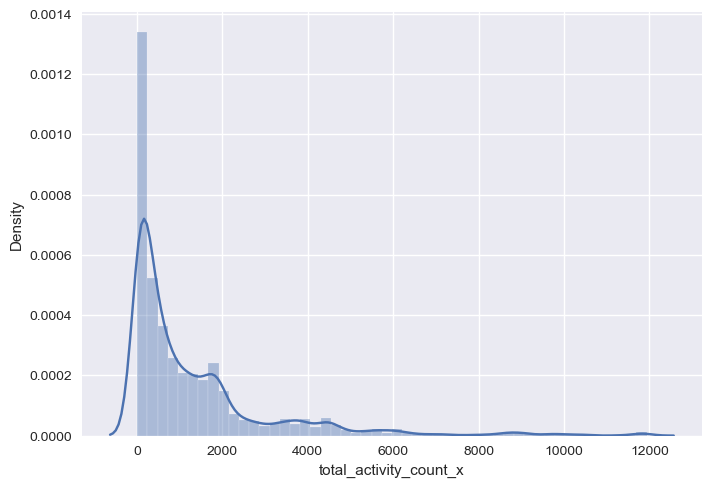

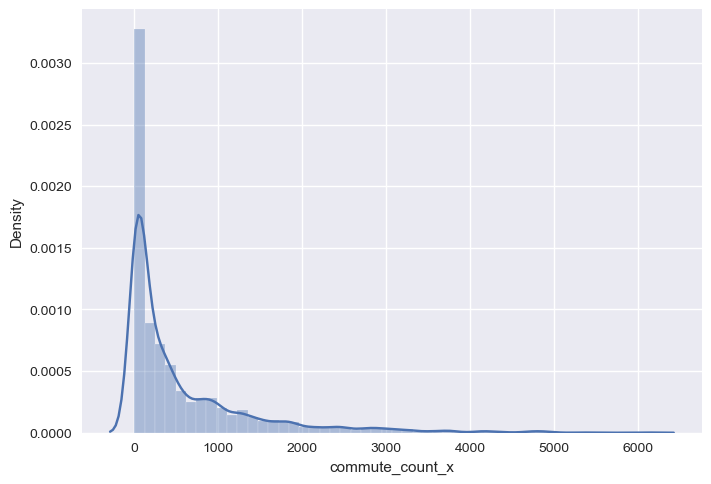

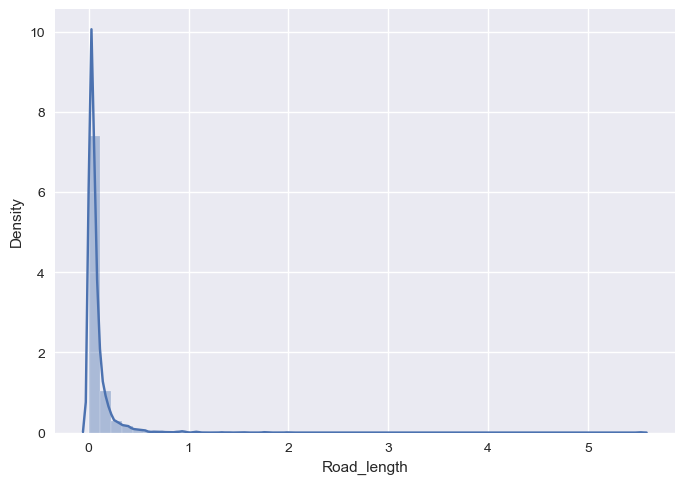

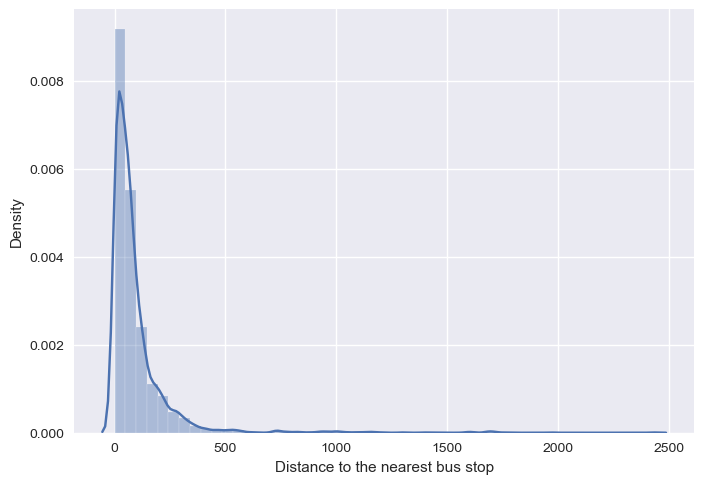

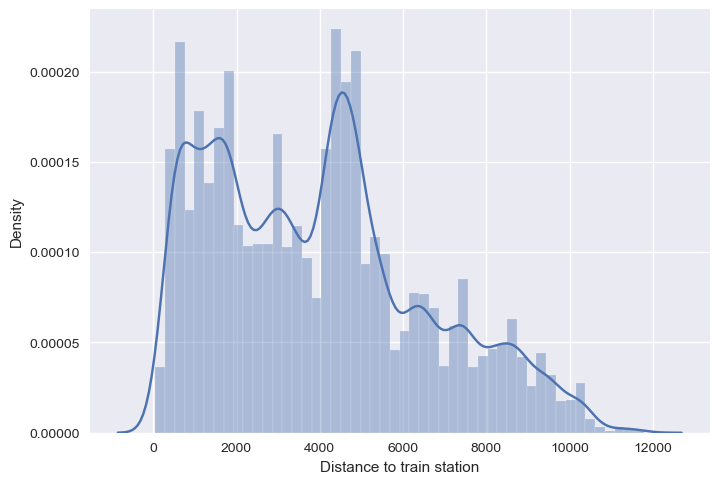

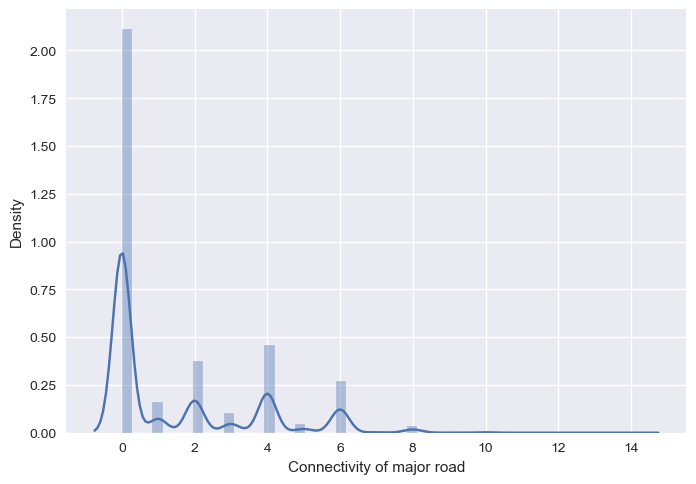

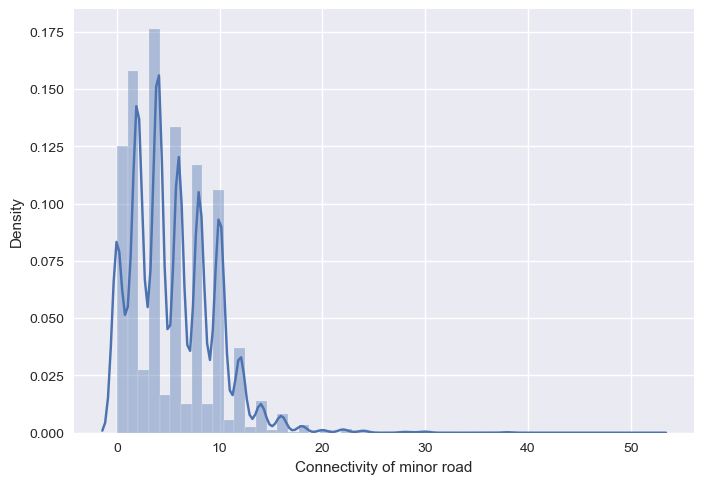

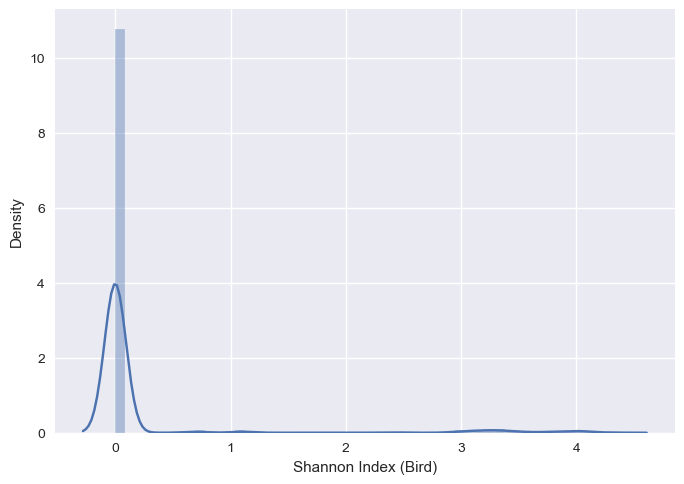

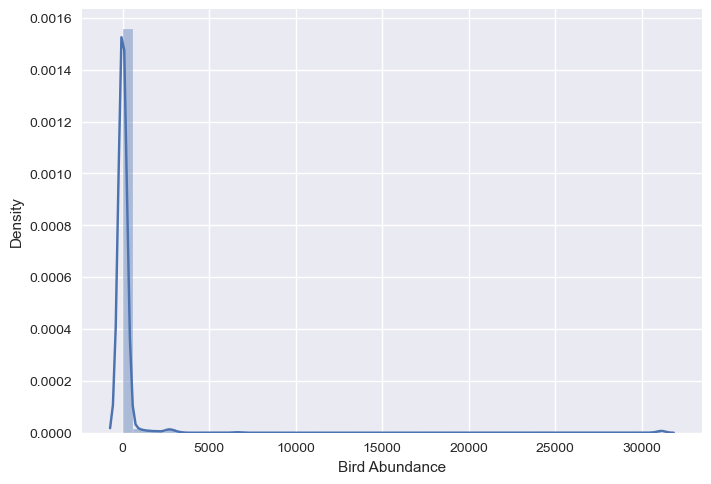

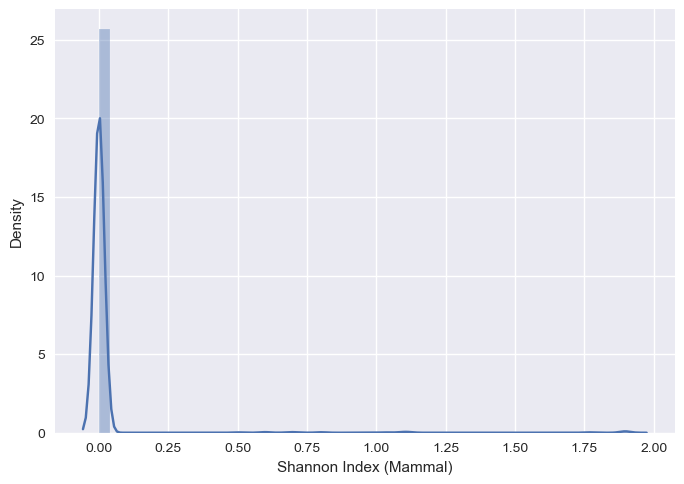

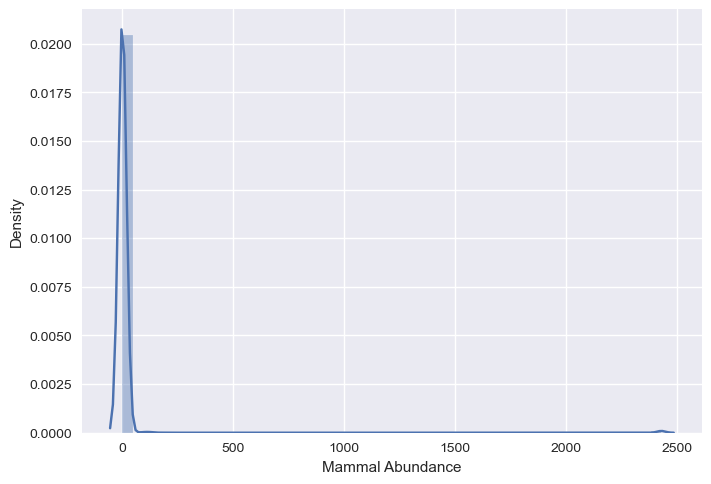

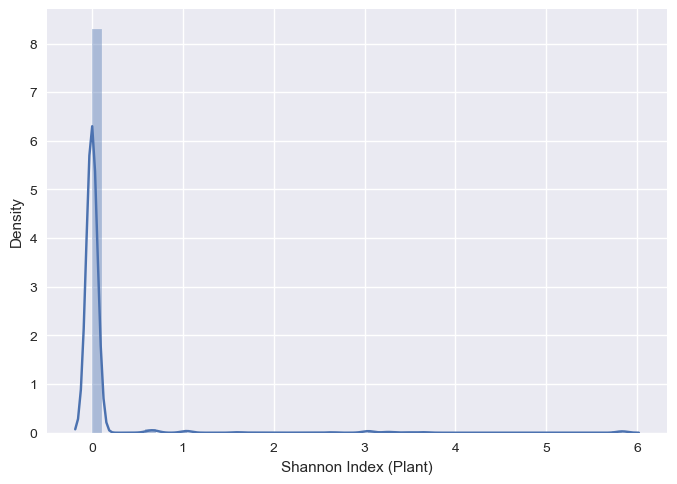

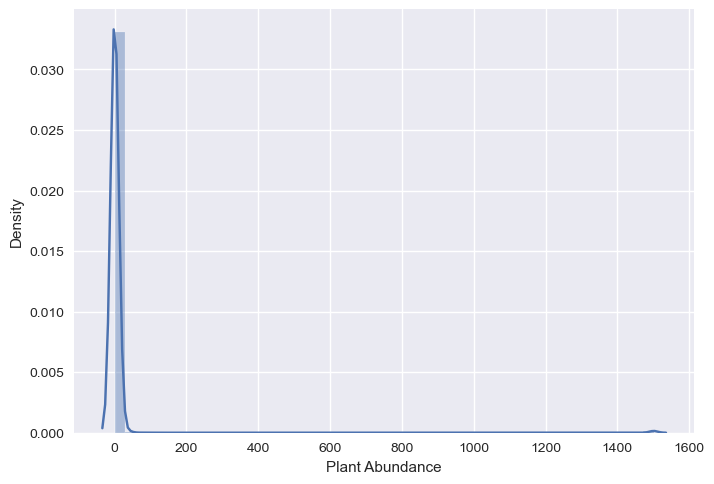

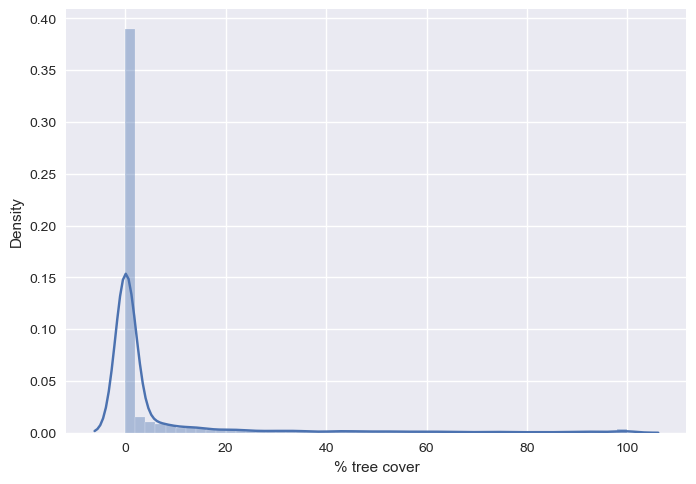

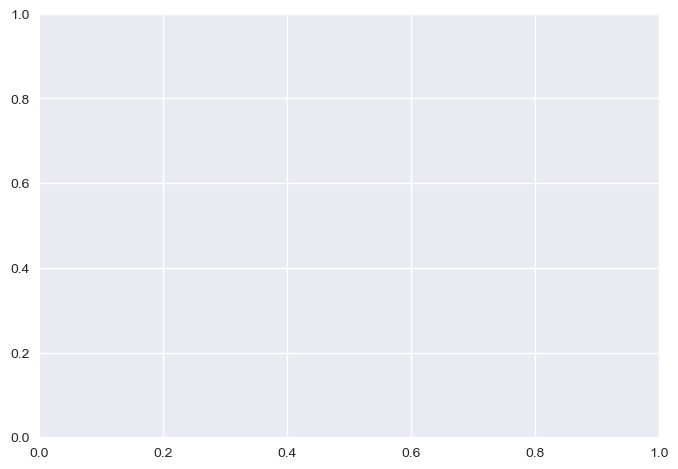

In [29]:
#hist = group.hist()
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

for column in group.columns:
    plt.figure()             # <==================== here!
    sns.distplot(group[column])

In [30]:
# Correlation between all the columns of DataFrame.
df2 = group.corrwith(group['Rec count'], method = "spearman")

print(df2)

TypeError: '<' not supported between instances of 'LineString' and 'LineString'

In [31]:
import feather
#group.to_feather('group.feather')
group.reset_index()
group
group.to_csv(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\MODEL\group.csv')

In [32]:
group.columns

Index(['edge_id', 'total_activity_count_x', 'commute_count_x', 'Road_length',
       'Distance to the nearest bus stop', 'Distance to train station',
       'Connectivity of major road', 'Connectivity of minor road',
       'Shannon Index (Bird)', 'Bird Abundance', 'Shannon Index (Mammal)',
       'Mammal Abundance', 'Shannon Index (Plant)', 'Plant Abundance',
       '% tree cover', 'geometry', 'Unnamed: 0', 'hour', 'year', 'day',
       'minute', 'athlete_count', 'rev_athlete_count', 'activity_count',
       'rev_activity_count', 'total_athlete_count', 'total_activity_count_y',
       'activity_time', 'rev_activity_time', 'commute_count_y', 'Rec count',
       'Road_category_minor', 'CTGS True', 'DLUT Natural',
       'DLUT Other built-up', 'DLUT urban', 'TOTD Early PM Hours',
       'TOTD Late PM Hours', 'TOTD Midday hours', 'TOTD AM Peak Hours',
       'TOTD PM Peak Hours'],
      dtype='object')

In [33]:
group.columns = group.columns.str.replace(' ', '_')

In [34]:
group.columns

Index(['edge_id', 'total_activity_count_x', 'commute_count_x', 'Road_length',
       'Distance_to_the_nearest_bus_stop', 'Distance_to_train_station',
       'Connectivity_of_major_road', 'Connectivity_of_minor_road',
       'Shannon_Index_(Bird)', 'Bird_Abundance', 'Shannon_Index_(Mammal)',
       'Mammal_Abundance', 'Shannon_Index_(Plant)', 'Plant_Abundance',
       '%_tree_cover', 'geometry', 'Unnamed:_0', 'hour', 'year', 'day',
       'minute', 'athlete_count', 'rev_athlete_count', 'activity_count',
       'rev_activity_count', 'total_athlete_count', 'total_activity_count_y',
       'activity_time', 'rev_activity_time', 'commute_count_y', 'Rec_count',
       'Road_category_minor', 'CTGS_True', 'DLUT_Natural',
       'DLUT_Other_built-up', 'DLUT_urban', 'TOTD_Early_PM_Hours',
       'TOTD_Late_PM_Hours', 'TOTD_Midday_hours', 'TOTD_AM_Peak_Hours',
       'TOTD_PM_Peak_Hours'],
      dtype='object')

In [35]:
group =group.rename(columns={"Shannon_Index_(Bird)":"Shannon_Index_Bird","Shannon_Index_(Mammal)":"Shannon_Index_Mammal","Shannon_Index_(Plant)":"Shannon_Index_Plant","DLUT_Other_built-up" : "DLUT_Other_built_up","%_tree_cover": "pct_tree" })
group.columns

Index(['edge_id', 'total_activity_count_x', 'commute_count_x', 'Road_length',
       'Distance_to_the_nearest_bus_stop', 'Distance_to_train_station',
       'Connectivity_of_major_road', 'Connectivity_of_minor_road',
       'Shannon_Index_Bird', 'Bird_Abundance', 'Shannon_Index_Mammal',
       'Mammal_Abundance', 'Shannon_Index_Plant', 'Plant_Abundance',
       'pct_tree', 'geometry', 'Unnamed:_0', 'hour', 'year', 'day', 'minute',
       'athlete_count', 'rev_athlete_count', 'activity_count',
       'rev_activity_count', 'total_athlete_count', 'total_activity_count_y',
       'activity_time', 'rev_activity_time', 'commute_count_y', 'Rec_count',
       'Road_category_minor', 'CTGS_True', 'DLUT_Natural',
       'DLUT_Other_built_up', 'DLUT_urban', 'TOTD_Early_PM_Hours',
       'TOTD_Late_PM_Hours', 'TOTD_Midday_hours', 'TOTD_AM_Peak_Hours',
       'TOTD_PM_Peak_Hours'],
      dtype='object')

In [36]:
#save group with rec count to file to open in R for GLMM
group.to_csv(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\MODEL\Newcgroup2.csv')


In [37]:
group.to_file(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\MODEL\Newcgroup2.geojson')

In [38]:
group.describe(include=['float'])

,Road_length,Distance_to_the_nearest_bus_stop,Distance_to_train_station,Shannon_Index_Bird,Bird_Abundance,Shannon_Index_Mammal,Mammal_Abundance,Shannon_Index_Plant,Plant_Abundance,pct_tree,activity_time,rev_activity_time
count,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000,45515.000000
mean,0.080008,95.560906,3964.669909,0.201498,193.307020,0.019679,10.871735,0.077358,6.837372,6.153496,66.532594,53.959739
std,0.164662,157.423492,2565.755371,0.797629,2057.555181,0.165115,157.897797,0.522477,97.565378,17.448653,372.731573,367.439464
min,0.000006,0.000000,50.136943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018618,21.588762,1751.473294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.040348,56.531936,3812.072906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,0.082003,109.631287,5456.801412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.676649,23.000000,14.000000
max,5.528865,2432.678126,11784.972520,4.328743,31124.000000,1.916094,2429.000000,5.834053,1501.000000,100.000000,26590.000000,28932.000000


In [39]:
#check to see if any commute counts are higher than total acitivity count
higher = group[group["commute_count_x"]>group['total_activity_count_x']]
higher

,edge_id,total_activity_count_x,commute_count_x,Road_length,Distance_to_the_nearest_bus_stop,Distance_to_train_station,Connectivity_of_major_road,Connectivity_of_minor_road,Shannon_Index_Bird,Bird_Abundance,...,Road_category_minor,CTGS_True,DLUT_Natural,DLUT_Other_built_up,DLUT_urban,TOTD_Early_PM_Hours,TOTD_Late_PM_Hours,TOTD_Midday_hours,TOTD_AM_Peak_Hours,TOTD_PM_Peak_Hours


In [44]:
group.columns

Index(['edge_id', 'total_activity_count_x', 'commute_count_x', 'Road_length',
       'Distance_to_the_nearest_bus_stop', 'Distance_to_train_station',
       'Connectivity_of_major_road', 'Connectivity_of_minor_road',
       'Shannon_Index_Bird', 'Bird_Abundance', 'Shannon_Index_Mammal',
       'Mammal_Abundance', 'Shannon_Index_Plant', 'Plant_Abundance',
       'pct_tree', 'geometry', 'Unnamed:_0', 'hour', 'year', 'day', 'minute',
       'athlete_count', 'rev_athlete_count', 'activity_count',
       'rev_activity_count', 'total_athlete_count', 'total_activity_count_y',
       'activity_time', 'rev_activity_time', 'commute_count_y', 'Rec_count',
       'Road_category_minor', 'CTGS_True', 'DLUT_Natural',
       'DLUT_Other_built_up', 'DLUT_urban', 'TOTD_Early_PM_Hours',
       'TOTD_Late_PM_Hours', 'TOTD_Midday_hours', 'TOTD_AM_Peak_Hours',
       'TOTD_PM_Peak_Hours'],
      dtype='object')

In [55]:
#group3= group
group3 = group.drop(['activity_time','rev_activity_time','total_athlete_count','rev_activity_count','minute','day','year','hour','geometry','edge_id','activity_count','rev_athlete_count','athlete_count'], axis=1)
group3 = group.drop(['total_activity_count_x', 'commute_count_x','Unnamed:_0'], axis=1)
group3 =group3.rename(columns={"shannon(bird)": "Shannon Index (Bird)","shannon(mammal)": "Shannon Index (Mammal)","shannon(plants)": "Shannon Index (Plant)" })
group3 =group3.rename(columns={"Bcount": "Bird Abundance","Mcount": "Mammal Abundance","Pcount": "Plant Abundance" })
group3 =group3.rename(columns={"length_km": "Road_length","distances to nearest bus stop(m)": "Distance to the nearest bus stop (km)","Distance to train station (m)":"Distance to train station (km)"})
group3 =group3.rename(columns={"major intersections": "Connectivity of major road","minor intersections": "Connectivity of minor road", "Rec count_y": "rec_count"})
group3 =group3.rename(columns={"athlete_count": "Athlete count","total_activity_count_y": " Total_activity_count", "activity_time": "Activity time",'pct_tree': '%_Tree_cover','commute_count_y': 'Commute_count','Rec_count': 'Recreational_count'})

group3.columns

Index(['edge_id', 'Road_length', 'Distance_to_the_nearest_bus_stop',
       'Distance_to_train_station', 'Connectivity_of_major_road',
       'Connectivity_of_minor_road', 'Shannon_Index_Bird', 'Bird_Abundance',
       'Shannon_Index_Mammal', 'Mammal_Abundance', 'Shannon_Index_Plant',
       'Plant_Abundance', '%_Tree_cover', 'geometry', 'hour', 'year', 'day',
       'minute', 'Athlete count', 'rev_athlete_count', 'activity_count',
       'rev_activity_count', 'total_athlete_count', ' Total_activity_count',
       'Activity time', 'rev_activity_time', 'Commute_count',
       'Recreational_count', 'Road_category_minor', 'CTGS_True',
       'DLUT_Natural', 'DLUT_Other_built_up', 'DLUT_urban',
       'TOTD_Early_PM_Hours', 'TOTD_Late_PM_Hours', 'TOTD_Midday_hours',
       'TOTD_AM_Peak_Hours', 'TOTD_PM_Peak_Hours'],
      dtype='object')

In [57]:

group3.dtypes
for column in group3.columns:
    print(column,':',pd.api.types.infer_dtype(group3[column]))

edge_id : integer
Road_length : floating
Distance_to_the_nearest_bus_stop : floating
Distance_to_train_station : floating
Connectivity_of_major_road : integer
Connectivity_of_minor_road : integer
Shannon_Index_Bird : floating
Bird_Abundance : floating
Shannon_Index_Mammal : floating
Mammal_Abundance : floating
Shannon_Index_Plant : floating
Plant_Abundance : floating
%_Tree_cover : floating
geometry : unknown-array
hour : integer
year : integer
day : integer
minute : integer
Athlete count : integer
rev_athlete_count : integer
activity_count : integer
rev_activity_count : integer
total_athlete_count : integer
 Total_activity_count : integer
Activity time : floating
rev_activity_time : floating
Commute_count : integer
Recreational_count : integer
Road_category_minor : boolean
CTGS_True : boolean
DLUT_Natural : boolean
DLUT_Other_built_up : boolean
DLUT_urban : boolean
TOTD_Early_PM_Hours : boolean
TOTD_Late_PM_Hours : boolean
TOTD_Midday_hours : boolean
TOTD_AM_Peak_Hours : boolean
TOTD_

In [58]:
group3 = group3.drop(['hour', 'year', 'day','edge_id',
       'minute', 'Athlete count', 'rev_athlete_count', 'activity_count',
       'rev_activity_count', 'total_athlete_count','Activity time', 'rev_activity_time'], axis=1)
group3.columns

Index(['Road_length', 'Distance_to_the_nearest_bus_stop',
       'Distance_to_train_station', 'Connectivity_of_major_road',
       'Connectivity_of_minor_road', 'Shannon_Index_Bird', 'Bird_Abundance',
       'Shannon_Index_Mammal', 'Mammal_Abundance', 'Shannon_Index_Plant',
       'Plant_Abundance', '%_Tree_cover', 'geometry', ' Total_activity_count',
       'Commute_count', 'Recreational_count', 'Road_category_minor',
       'CTGS_True', 'DLUT_Natural', 'DLUT_Other_built_up', 'DLUT_urban',
       'TOTD_Early_PM_Hours', 'TOTD_Late_PM_Hours', 'TOTD_Midday_hours',
       'TOTD_AM_Peak_Hours', 'TOTD_PM_Peak_Hours'],
      dtype='object')

In [59]:

stats = group3.describe().T



stats = pd.DataFrame(stats)
stats =stats.rename(columns={"50%":"median"})
stats["IQR"] = stats["75%"] - stats["25%"]
stats = stats.drop(["count","25%","75%"], axis =1)
stats

,mean,std,min,median,max,IQR
Road_length,0.080008,0.164662,0.000006,0.040348,5.528865,0.063385
Distance_to_the_nearest_bus_stop,95.560906,157.423492,0.000000,56.531936,2432.678126,88.042525
Distance_to_train_station,3964.669909,2565.755371,50.136943,3812.072906,11784.972520,3705.328118
Connectivity_of_major_road,1.483006,2.130460,0.000000,0.000000,14.000000,3.000000
Connectivity_of_minor_road,5.498737,4.011044,0.000000,4.000000,52.000000,6.000000
Shannon_Index_Bird,0.201498,0.797629,0.000000,0.000000,4.328743,0.000000
Bird_Abundance,193.307020,2057.555181,0.000000,0.000000,31124.000000,0.000000
Shannon_Index_Mammal,0.019679,0.165115,0.000000,0.000000,1.916094,0.000000
Mammal_Abundance,10.871735,157.897797,0.000000,0.000000,2429.000000,0.000000
Shannon_Index_Plant,0.077358,0.522477,0.000000,0.000000,5.834053,0.000000


In [1]:
group.columns

NameError: name 'group' is not defined

In [60]:
stats.to_csv(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\results\total_stats.csv', index=True)

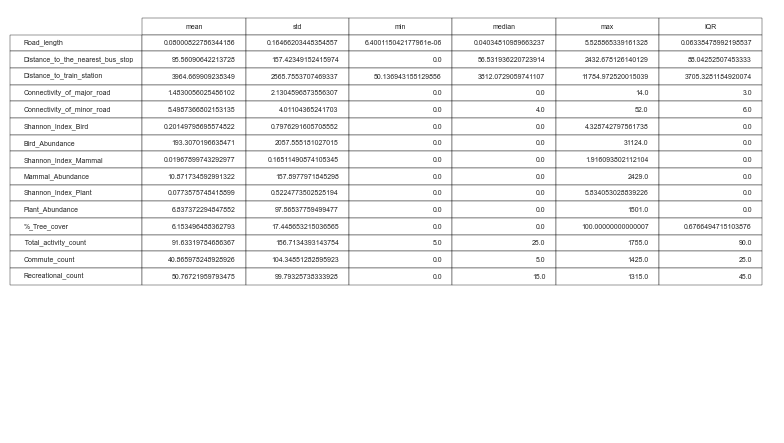

In [61]:
import matplotlib.pyplot as plt
from pandas.plotting import table


    #create a subplot without frame
plot = plt.subplot(111, frame_on=False)

    #remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

    #create the table plot and position it in the upper left corner
table(plot, stats,loc='upper right')


In [66]:
group = group.drop(['activity_time','rev_activity_time','total_athlete_count','rev_activity_count','minute','day','year','hour','Unnamed:_0_y','geometry','Unnamed:_0_x','activity_count','rev_athlete_count','athlete_count'], axis=1)
#group = group.drop(['total_activity_count_x', 'commute_count_x'], axis=1)
group =group.rename(columns={'total_activity_count_y':'Total_activity_count','commute_count_y':'Commute_count'})

group.columns

KeyError: "['Unnamed:_0_y', 'Unnamed:_0_x'] not found in axis"

In [258]:
group.to_csv(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\MODEL\Newcgroup2.csv')

In [74]:
group1=group.drop(['geometry', 'commute_count_x'], axis=1)

group3.dtypes
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','bool']
correlation = group3.select_dtypes(include=numerics).corr()
correlation.to_csv(r'C:\Users\ezxph2\OneDrive - The University of Nottingham\PhD\DATA\PAPER_1\MODEL\correlation_matrix.csv')

In [81]:
roads["road_category_right"].unique()
roads.columns
roads["land_cover"].unique()

array(['Industrial_Commercial_Public', 'Natural', 'urban',
       'Otherbuilt-up'], dtype=object)